# DF/DN on CIFAR

In [1]:
# Import necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define color palette
sns.set(color_codes=True, style="white", context="talk", font_scale=1.5)

In [3]:
def load_result(filename):
    """
    Loads results from specified file
    """
    inputs = open(filename, "r")
    lines = inputs.readlines()
    ls = []
    for line in lines:
        ls.append(float(line.strip()))
    return ls


def load_results(prefix):
    """
    Loads results from specified files
    """
    acc_ls = []
    time_ls = []
    for name in names:
        acc_ls.append(load_result(prefix + name + ".txt"))
        time_ls.append(load_result(prefix + name + "_train_time.txt"))
    return acc_ls, time_ls


def load_results_st(prefix):
    """
    Loads results from similar time files
    """
    acc_ls = []
    time_ls = []
    for name in names:
        if name != "naive_rf" and name != "svm":
            acc_ls.append(load_result(prefix + name + "_st.txt"))
            time_ls.append(load_result(prefix + name + "_train_time_st.txt"))
        else:
            acc_ls.append(load_result(prefix + name + ".txt"))
            time_ls.append(load_result(prefix + name + "_train_time.txt"))
    return acc_ls, time_ls


def load_results_sc(prefix):
    """
    Loads results from similar cost files
    """
    acc_ls = []
    time_ls = []
    for name in names:
        if name != "naive_rf" and name != "svm":
            acc_ls.append(load_result(prefix + name + "_sc.txt"))
            time_ls.append(load_result(prefix + name + "_train_time_sc.txt"))
        else:
            acc_ls.append(load_result(prefix + name + ".txt"))
            time_ls.append(load_result(prefix + name + "_train_time_lc.txt"))
    return acc_ls, time_ls


def produce_mean(ls):
    """
    Produces means from list of 8 results
    """
    ls_space = []
    for i in range(int(len(ls) / 8)):
        l = ls[i * 8 : (i + 1) * 8]
        ls_space.append(l)
    # print(len(ls_space))
    # print(ls_space)
    print("mean:", np.mean(ls_space, axis=0))
    print("min:", np.min(ls_space, axis=0))

    return np.mean(ls_space, axis=0)

In [4]:
def plot_acc(col, accs, pos, samples_space):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][3][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dotted",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][4][k * 8 : (k + 1) * 8],
            color="#4daf4a",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-1L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="CNN-2L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
            label="CNN-5L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
            label="ResNet-18",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )


def plot_six():
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17, 11), constrained_layout=True)

    fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
    xtitles = ["3 Classes", "8 Classes", "90 Classes"]
    ytitles = ["Accuracy", "Wall Time (s)"]
    ylimits = [[0, 1], [1e-2, 1e2]]
    yticks = [[0, 0.5, 1], [1e-2, 1e0, 1e2]]

    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            count = 3 * i + j
            col.set_xscale("log")
            col.set_ylim(ylimits[i])

            if count == 2 or count == 5:
                samples_space = np.geomspace(100, 10000, num=8, dtype=int)
            else:
                samples_space = np.geomspace(10, 10000, num=8, dtype=int)

            # Label x axis and plot figures
            if count < 3:
                col.set_xticks([])
                col.set_title(xtitles[j])
                plot_acc(col, accs, j, samples_space)
            else:
                if count == 5:
                    col.set_xticks([1e2, 1e3, 1e4])
                else:
                    col.set_xticks([1e1, 1e2, 1e3, 1e4])
                col.set_yscale("log")
                plot_acc(col, accs, j + 3, samples_space)

            # Label y axis
            if count % 3 == 0:
                col.set_yticks(yticks[i])
                col.set_ylabel(ytitles[i])
            else:
                col.set_yticks([])

    fig.align_ylabels(
        ax[
            :,
        ]
    )

    leg = fig.legend(
        bbox_to_anchor=(0.53, -0.2),
        bbox_transform=plt.gcf().transFigure,
        ncol=3,
        loc="lower center",
    )
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)

In [5]:
def plot_acc_new(col, accs, pos, samples_space):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][3][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dotted",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][4][k * 8 : (k + 1) * 8],
            color="#4daf4a",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][5][k * 8 : (k + 1) * 8],
            color="#ff7f00",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-1L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="CNN-2L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
            label="CNN-5L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
            label="ResNet-18",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#ff7f00",
            label="XGBT",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#ff7f00",
        )

## DF/DN with Unbounded Time & Cost

## Comparsion of all six models of 3classes(2hr vs 6hr)

mean: [0.41111053 0.47347411 0.47766446 0.58670625 0.63475544 0.67025236
 0.7007688  0.7377548 ]
min: [0.32250221 0.32130204 0.32630411 0.40781875 0.50178253 0.35172872
 0.47713144 0.54250832]
mean: [0.39731472 0.50624461 0.57432868 0.63479436 0.67328171 0.70594977
 0.73064558 0.74750065]
min: [0.2777036  0.39240506 0.45317019 0.53375993 0.57028648 0.6293894
 0.65074024 0.65836698]
mean: [0.35549544 0.47314475 0.52005927 0.59760334 0.63679578 0.68728698
 0.73158253 0.76261336]
min: [0.32739274 0.33045021 0.42631345 0.45017794 0.52511111 0.55397285
 0.62936754 0.62522242]
mean: [0.33354469 0.33152174 0.52460749 0.54104771 0.55695954 0.58737923
 0.59977355 0.58888889]
min: [0.31317935 0.29347826 0.33899457 0.38451087 0.34442935 0.34442935
 0.36209239 0.37907609]
mean: [0.41653113 0.44704188 0.53086976 0.64092823 0.70757772 0.76782228
 0.82155345 0.86288966]
min: [0.30196598 0.35062333 0.311327   0.53805073 0.58846918 0.63618158
 0.72100729 0.76297769]
mean: [0.3331161  0.3331161  0.53474

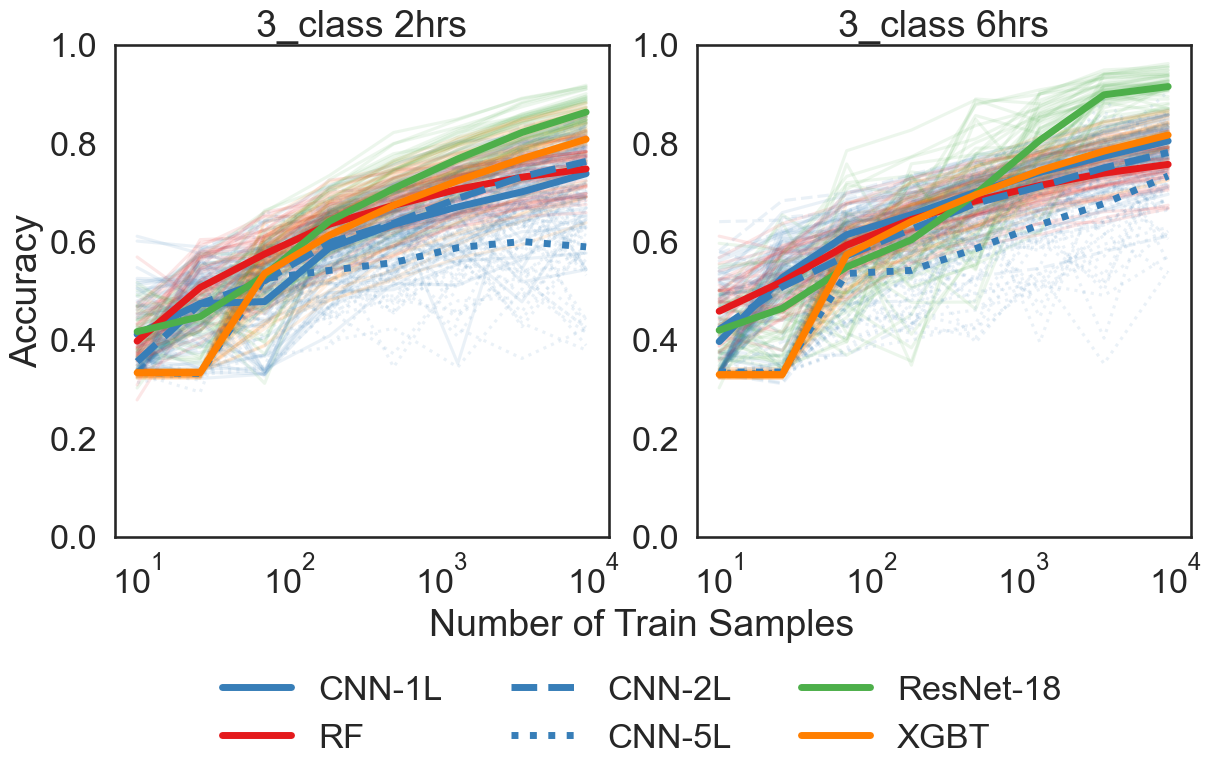

In [16]:
directory = "../benchmarks/vision/"
acc_3_2hr = [
    load_result(directory + "3_class/naive_rf_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_2l_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_5l_acc_2hr.txt"),
    load_result(directory + "3_class/resnet18_acc_2hr.txt"),
    load_result(directory + "3_class/gbt_acc_2hr.txt"),
]

acc_3_6hr = [
    load_result(directory + "3_class/naive_rf_acc_6hr.txt"),
    load_result(directory + "3_class/cnn32_acc_6hr.txt"),
    load_result(directory + "3_class/cnn32_2l_acc_6hr.txt"),
    load_result(directory + "3_class/cnn32_5l_acc_6hr.txt"),
    load_result(directory + "3_class/resnet18_acc_6hr.txt"),
    load_result(directory + "3_class/gbt_acc_6hr.txt"),
]

acc_3 = [acc_3_2hr, acc_3_6hr]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 9000, num=8, dtype=int)
xtitles = ["3_class 2hrs", "3_class 6hrs"]
yticks = [[0, 0.5, 1], [1e-2, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc_new(col, acc_3, i, samples_space)
    # if i == 0:
    #     col.set_ylabel("Accuracy")

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.show()



## Comparison of each model of 3 classes

### Xgboost Tree

max: [0.33965633 0.33965633 0.64261402 0.72067166 0.76433832 0.81097969
 0.84917959 0.88261549]
min: [0.32171582 0.32171582 0.38744155 0.47981366 0.5215173  0.56654836
 0.59361136 0.63797693]
max: [0.34106985 0.34106985 0.67655653 0.72070049 0.76379691 0.81346578
 0.84370123 0.86755853]
min: [0.32171227 0.32171227 0.48071413 0.54283831 0.60768386 0.65378705
 0.68891328 0.72435757]


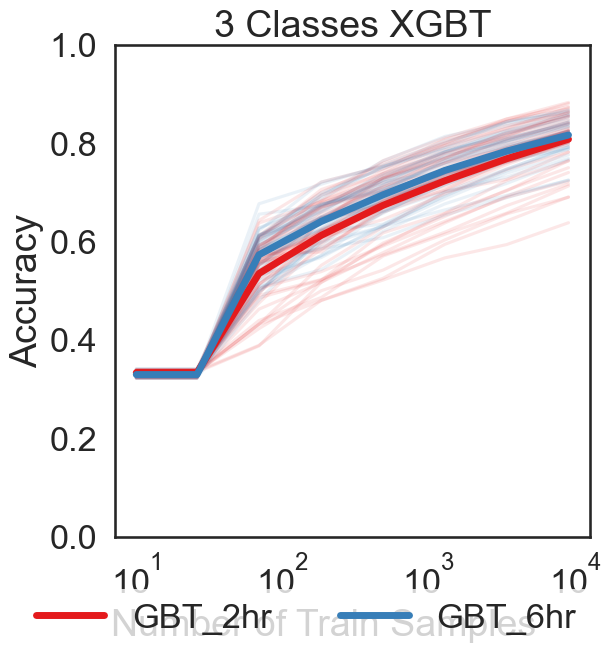

In [11]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="GBT_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="GBT_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/gbt_acc_2hr.txt"),
    load_result(directory + "3_class/gbt_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes XGBT")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### Naiver Random Forest

mean: [0.39731472 0.50624461 0.57432868 0.63479436 0.67328171 0.70594977
 0.73064558 0.74750065]
min: [0.2777036  0.39240506 0.45317019 0.53375993 0.57028648 0.6293894
 0.65074024 0.65836698]
mean: [0.45802222 0.51817037 0.59238519 0.64457037 0.68268148 0.71391852
 0.73896296 0.75660741]
min: [0.32466667 0.37833333 0.48266667 0.55533333 0.59166667 0.61366667
 0.639      0.66666667]


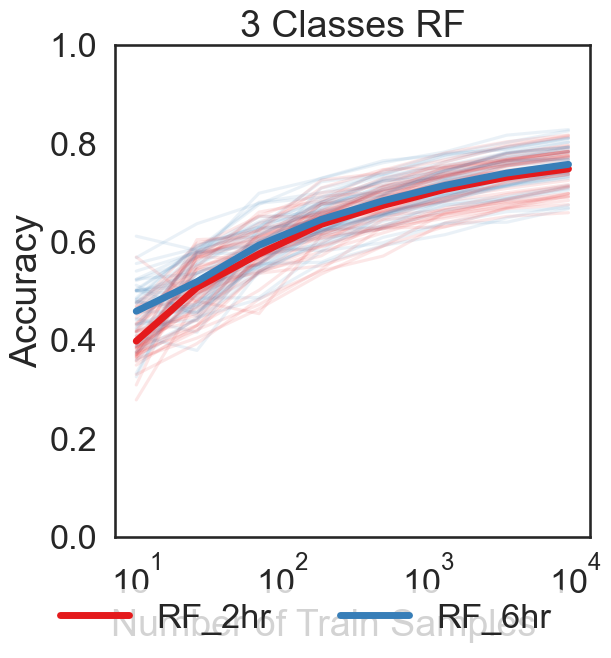

In [9]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="RF_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/naive_rf_acc_2hr.txt"),
    load_result(directory + "3_class/naive_rf_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes RF")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### CNN32_1l

max: [0.6105333  0.58890374 0.64121456 0.71422192 0.75574905 0.80330431
 0.82081949 0.85559247]
min: [0.32250221 0.32130204 0.32630411 0.40781875 0.50178253 0.35172872
 0.47713144 0.54250832]
max: [0.56715752 0.65853659 0.70031334 0.73260237 0.77484333 0.80703316
 0.84377798 0.86750224]
min: [0.32904941 0.32927099 0.47844539 0.53443709 0.58256071 0.62163355
 0.66234926 0.69584636]


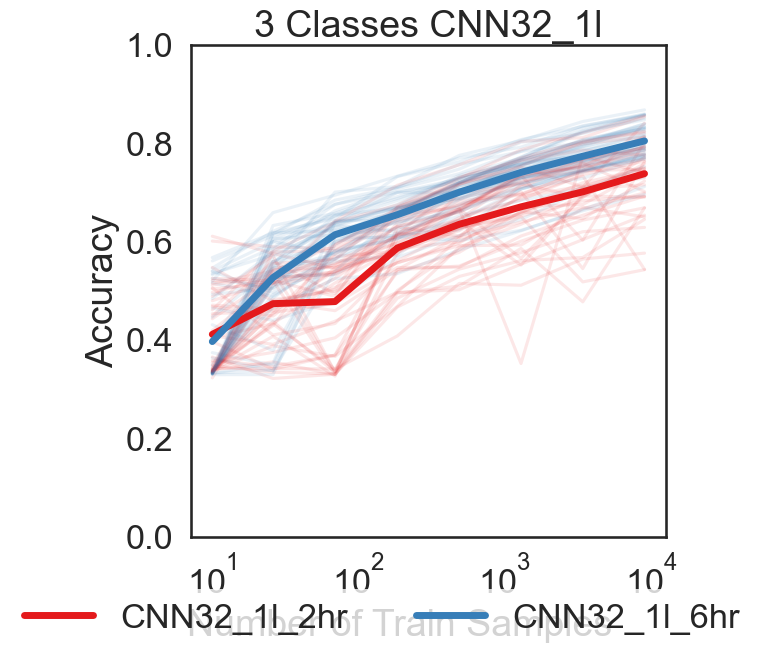

In [27]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_1l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_1l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/cnn32_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes CNN32_1l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### CNN32_2l

mean: [0.35549544 0.47314475 0.52005927 0.59760334 0.63679578 0.68728698
 0.73158253 0.76261336]
min: [0.32739274 0.33045021 0.42631345 0.45017794 0.52511111 0.55397285
 0.62936754 0.62522242]
mean: [0.4207266  0.50771777 0.57087996 0.62484443 0.67741583 0.7117582
 0.74955163 0.78085302]
min: [0.32123212 0.31076233 0.3690078  0.43166109 0.52865106 0.54537347
 0.57904125 0.61137124]


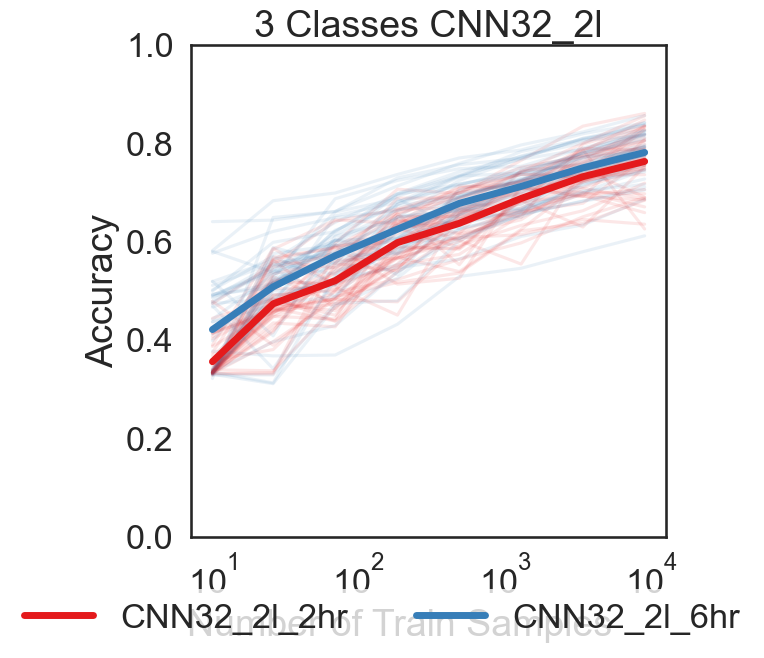

In [10]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_2l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_2l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )

RF = [
    load_result(directory + "3_class/cnn32_2l_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_2l_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes CNN32_2l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### CNN32_5l

mean: [0.33354469 0.33152174 0.52460749 0.54104771 0.55695954 0.58737923
 0.59977355 0.58888889]
min: [0.31317935 0.29347826 0.33899457 0.38451087 0.34442935 0.34442935
 0.36209239 0.37907609]
mean: [0.33446181 0.3343533  0.53480903 0.54113498 0.58534071 0.63390842
 0.67694227 0.73301866]
min: [0.32324219 0.32861328 0.37695312 0.39941406 0.39453125 0.39501953
 0.3515625  0.53564453]


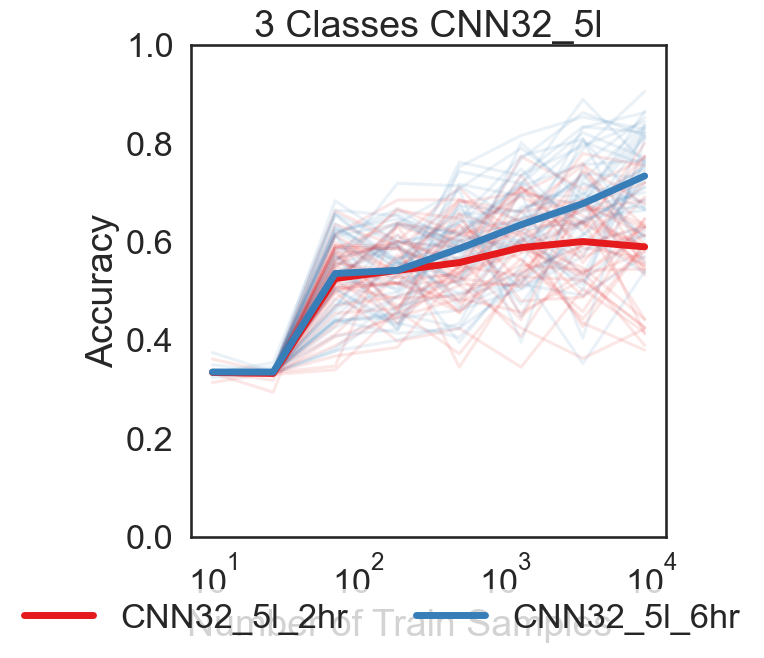

In [14]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_5l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_5l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/cnn32_5l_acc_2hr.txt"),
    load_result(directory + "3_class/cnn32_5l_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes CNN32_5l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



### Resnet18

max: [0.51663709 0.57549283 0.6630094  0.73392265 0.82143646 0.84906077
 0.89117452 0.91764445]
min: [0.30196598 0.35062333 0.311327   0.53805073 0.58846918 0.63618158
 0.72100729 0.76297769]
max: [0.59613696 0.65411188 0.78439653 0.82640587 0.88967656 0.90817918
 0.94863916 0.96169002]
min: [0.30226868 0.34234033 0.36861962 0.34832962 0.46226623 0.6159612
 0.7979664  0.82272325]


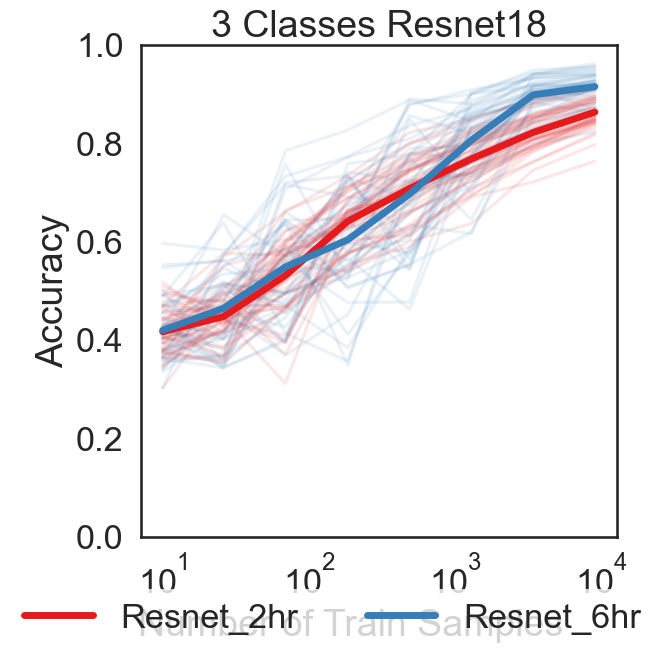

In [17]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="Resnet_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="Resnet_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/resnet18_acc_2hr.txt"),
    load_result(directory + "3_class/resnet18_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes Resnet18")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# 8 Classes

In [90]:
directory = "../benchmarks/vision/"
acc_8_2hr = [
    load_result(directory + "8_class/naive_rf_acc_2hr.txt"),
    load_result(directory + "8_class/cnn32_acc_2hr.txt"),
    load_result(directory + "8_class/cnn32_2l_acc_2hr.txt"),
    load_result(directory + "8_class/cnn32_5l_acc_2hr.txt"),
    load_result(directory + "8_class/resnet18_acc_2hr.txt"),
    load_result(directory + "8_class/gbt_acc_2hr.txt"),
]

acc_8_6hr = [
    load_result(directory + "8_class/naive_rf_acc_6hr.txt"),
    load_result(directory + "8_class/cnn32_acc_6hr.txt"),
    load_result(directory + "8_class/cnn32_2l_acc_6hr.txt"),
    load_result(directory + "8_class/cnn32_5l_acc_6hr.txt"),
    load_result(directory + "8_class/resnet18_acc_6hr.txt"),
    load_result(directory + "8_class/gbt_acc_6hr.txt"),
]

kappa_8_2hr = [
    load_result(directory + "8_class/naive_rf_kappa_2hr.txt"),
    load_result(directory + "8_class/cnn32_kappa_2hr.txt"),
    load_result(directory + "8_class/cnn32_2l_kappa_2hr.txt"),
    load_result(directory + "8_class/cnn32_5l_kappa_2hr.txt"),
    load_result(directory + "8_class/resnet18_kappa_2hr.txt"),
    load_result(directory + "8_class/gbt_kappa_2hr.txt"),
]

acc_3 = [acc_8_2hr, acc_8_6hr]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 9000, num=8, dtype=int)
xtitles = ["8_class 2hrs", "8_class 6hrs"]
yticks = [[0, 0.5, 1], [1e-2, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc_new(col, acc_3, i, samples_space)
    # if i == 0:
    #     col.set_ylabel("Accuracy")

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.show()



mean: [0.13050556 0.17770556 0.25926111 0.30597778 0.37366667 0.42619444
 0.49264444 0.52913333]
min: [0.107   0.11875 0.2195  0.254   0.31825 0.37425 0.443   0.48175]
mean: [0.15542226 0.21373909 0.27333352 0.32865128 0.37920062 0.42166469
 0.45611615 0.48513529]
min: [0.10659983 0.16506878 0.21779115 0.28116378 0.33514462 0.38555426
 0.41222204 0.44766761]
mean: [0.14252371 0.1951518  0.23286376 0.27879762 0.36890372 0.43647015
 0.49779673 0.552816  ]
min: [0.10811036 0.13043841 0.1791816  0.21570262 0.30305553 0.38259496
 0.44926446 0.48153693]
mean: [0.12465847 0.12482354 0.12408925 0.21119649 0.27275729 0.33427254
 0.38693648 0.44978939]
min: [0.09375    0.109375   0.0776127  0.12909836 0.1723873  0.21849385
 0.25435451 0.24974385]
mean: [0.16551625 0.2187072  0.27861636 0.36506348 0.45394926 0.57524813
 0.6745084  0.72188898]
min: [0.12471919 0.15782018 0.22292622 0.32173841 0.40993996 0.53579465
 0.62611449 0.68043043]
mean: [0.12396928 0.12396928 0.12396928 0.28431159 0.3431633

# XGBT

mean: [0.12396928 0.12396928 0.12396928 0.28431159 0.34316333 0.41279796
 0.47932024 0.54074229]
min: [0.12166612 0.12166612 0.12166612 0.2418458  0.31675479 0.38160843
 0.43787178 0.49322538]
mean: [0.1227273  0.1227273  0.2176634  0.30655261 0.37400047 0.44230593
 0.49902662 0.54575134]
min: [0.12148369 0.12148369 0.17768183 0.26206552 0.3347725  0.40933245
 0.45292262 0.5031551 ]


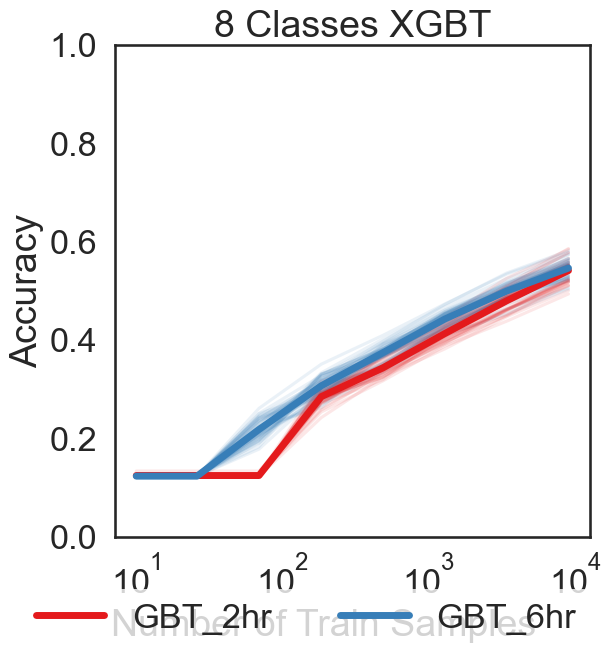

In [17]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="GBT_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="GBT_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "8_class/gbt_acc_2hr.txt"),
    load_result(directory + "8_class/gbt_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes XGBT")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# RF

In [20]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="RF_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "8_class/naive_rf_acc_2hr.txt"),
    load_result(directory + "8_class/naive_rf_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes RF")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



max: [0.20112938 0.27018478 0.30974777 0.37174257 0.4246827  0.45716433
 0.48931196 0.52010657]
min: [0.10659983 0.16506878 0.21779115 0.28116378 0.33514462 0.38555426
 0.41222204 0.44766761]
max: [0.2010159  0.27929737 0.28304717 0.36134944 0.40844718 0.45218261
 0.49309912 0.52396487]
min: [0.1178283  0.17595993 0.20753935 0.29191877 0.33968517 0.38062139
 0.42433632 0.44979482]


# CNN32_1l

max: [0.16675 0.255   0.326   0.33375 0.41225 0.47175 0.5355  0.575  ]
min: [0.107   0.11875 0.2195  0.254   0.31825 0.37425 0.443   0.48175]
max: [0.204   0.27025 0.2965  0.351   0.41075 0.4805  0.531   0.60525]
min: [0.10325 0.13    0.202   0.2615  0.31625 0.383   0.43675 0.47025]


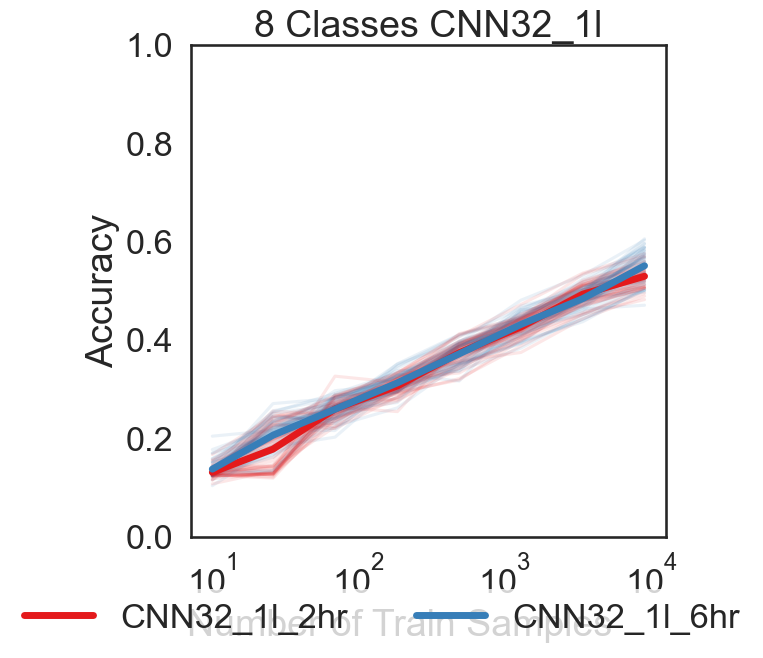

In [30]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_1l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_1l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "8_class/cnn32_acc_2hr.txt"),
    load_result(directory + "8_class/cnn32_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes CNN32_1l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# CNN32_2l

max: [0.18817742 0.24270469 0.29987474 0.34146545 0.41307059 0.47972016
 0.54637802 0.61150058]
min: [0.10811036 0.13043841 0.1791816  0.21570262 0.30305553 0.38259496
 0.44926446 0.48153693]
max: [0.18464244 0.24548857 0.29342919 0.35094434 0.42018623 0.4953638
 0.55534208 0.61409061]
min: [0.10587648 0.12310132 0.20516869 0.27771315 0.33363803 0.40296766
 0.44972578 0.51454213]


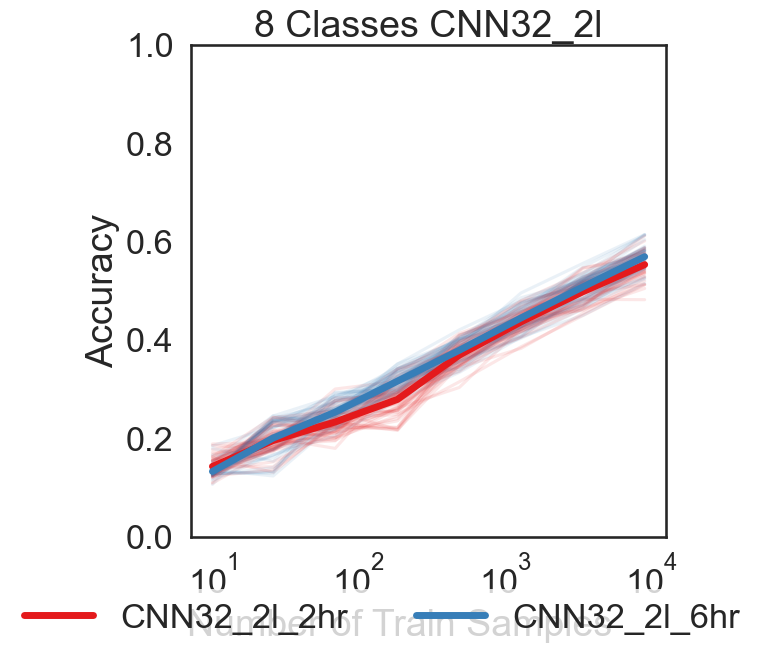

In [31]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_2l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_2l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "8_class/cnn32_2l_acc_2hr.txt"),
    load_result(directory + "8_class/cnn32_2l_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes CNN32_2l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# CNN32_5l

max: [0.14369877 0.13729508 0.13294057 0.35271516 0.39626025 0.45543033
 0.51306352 0.64959016]
min: [0.09375    0.109375   0.0776127  0.12909836 0.1723873  0.21849385
 0.25435451 0.24974385]
max: [0.1494368  0.28560701 0.3048811  0.40350438 0.42478098 0.47609512
 0.56846058 0.63729662]
min: [0.08911139 0.1359199  0.15193992 0.13341677 0.19198999 0.19924906
 0.28710889 0.24906133]


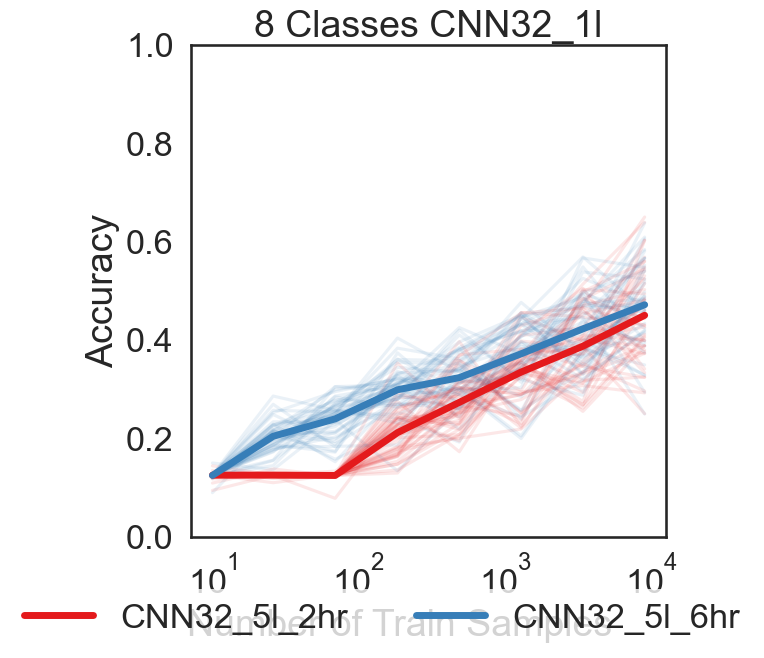

In [32]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_5l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_5l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "8_class/cnn32_5l_acc_2hr.txt"),
    load_result(directory + "8_class/cnn32_5l_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes CNN32_1l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# Resnet18

max: [0.23445574 0.2673721  0.34007996 0.40796061 0.49109669 0.61269365
 0.7244711  0.78371162]
min: [0.12471919 0.15782018 0.22292622 0.32173841 0.40993996 0.53579465
 0.62611449 0.68043043]
max: [0.24148839 0.29511748 0.36647775 0.44975837 0.54760915 0.67284724
 0.76576277 0.82508775]
min: [0.12640053 0.13850276 0.15416632 0.18750522 0.24503919 0.43062599
 0.66144357 0.71795299]


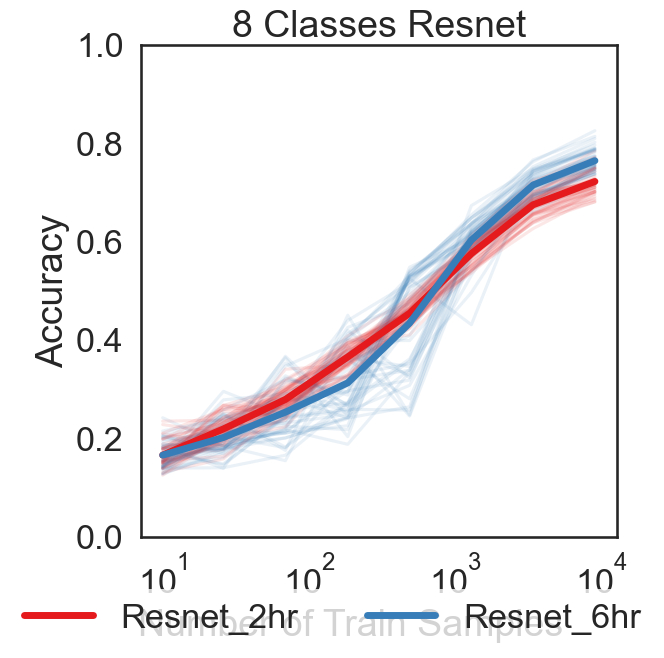

In [12]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="Resnet_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="Resnet_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "8_class/resnet18_acc_2hr.txt"),
    load_result(directory + "8_class/resnet18_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes Resnet")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# 90 Classes

mean: [0.01279012 0.04689383 0.06388642 0.08025185 0.09831111 0.1277679
 0.15750123 0.19127407]
min: [0.00911111 0.03355556 0.05466667 0.06933333 0.08955556 0.11288889
 0.14888889 0.17911111]
mean: [0.02346245 0.04346623 0.06979185 0.08534559 0.1059184  0.12486437
 0.1465198  0.16531916]
min: [0.01265823 0.03483213 0.06138145 0.07315089 0.09546363 0.11440427
 0.14008589 0.15981364]
mean: [0.02062732 0.02771324 0.03725208 0.05679299 0.09053855 0.11740052
 0.14550614 0.18699884]
min: [0.01354853 0.01518744 0.02418639 0.0318787  0.07557924 0.09787518
 0.12435233 0.16750592]
mean: [0.01102892 0.01130118 0.01125494 0.01087995 0.03868598 0.07566651
 0.0937073  0.11632506]
min: [0.00809061 0.00531669 0.00809061 0.00693481 0.01479427 0.02797041
 0.05386038 0.03767915]
mean: [0.02487762 0.0480098  0.07451032 0.11317733 0.16035348 0.21799124
 0.28211698 0.35813555]
min: [0.01480166 0.03890533 0.05850118 0.10555884 0.15054718 0.20455554
 0.26960639 0.34564254]
mean: [0.01082317 0.01082317 0.01082

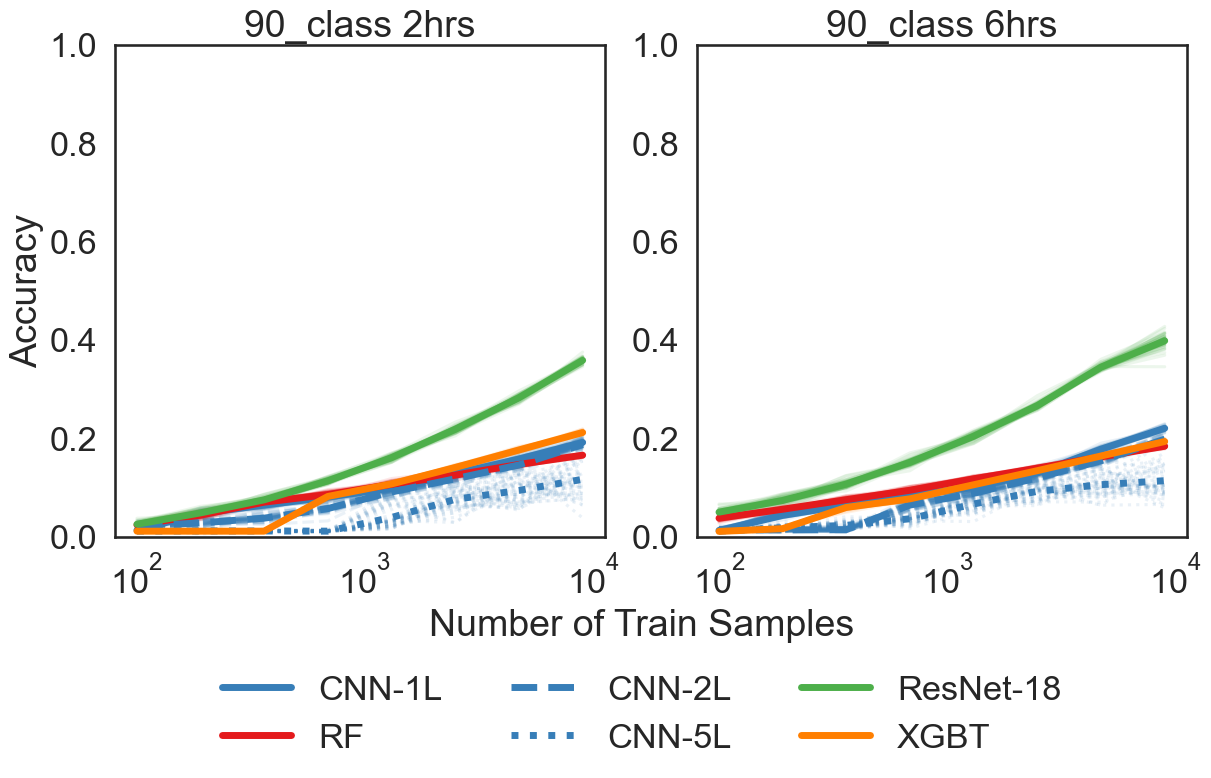

In [10]:
directory = "../benchmarks/vision/"
acc_90_2hr = [
    load_result(directory + "90_class/naive_rf_acc_2hr.txt"),
    load_result(directory + "90_class/cnn32_acc_2hr.txt"),
    load_result(directory + "90_class/cnn32_2l_acc_2hr.txt"),
    load_result(directory + "90_class/cnn32_5l_acc_2hr.txt"),
    load_result(directory + "90_class/resnet18_acc_2hr.txt"),
    load_result(directory + "90_class/gbt_acc_2hr.txt"),
]

acc_90_6hr = [
    load_result(directory + "90_class/naive_rf_acc_6hr.txt"),
    load_result(directory + "90_class/cnn32_acc_6hr.txt"),
    load_result(directory + "90_class/cnn32_2l_acc_6hr.txt"),
    load_result(directory + "90_class/cnn32_5l_acc_6hr.txt"),
    load_result(directory + "90_class/resnet18_acc_6hr.txt"),
    load_result(directory + "90_class/gbt_acc_6hr.txt"),
]

acc_3 = [acc_90_2hr, acc_90_6hr]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(100, 9000, num=8, dtype=int)
xtitles = ["90_class 2hrs", "90_class 6hrs"]
yticks = [[0, 0.5, 1], [1e-2, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc_new(col, acc_3, i, samples_space)
    # if i == 0:
    #     col.set_ylabel("Accuracy")

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.show()



# XGBT

mean: [0.01082317 0.01082317 0.01082317 0.08145576 0.10693682 0.14039737
 0.17593377 0.21147385]
min: [0.01080121 0.01080121 0.01080121 0.07369279 0.09991846 0.133536
 0.17014327 0.20522305]
mean: [0.01037035 0.01592234 0.05909747 0.07659265 0.10521269 0.13387595
 0.16368831 0.19312688]
min: [0.01034203 0.0091226  0.04914878 0.07038188 0.09949697 0.12269666
 0.15456362 0.1863879 ]


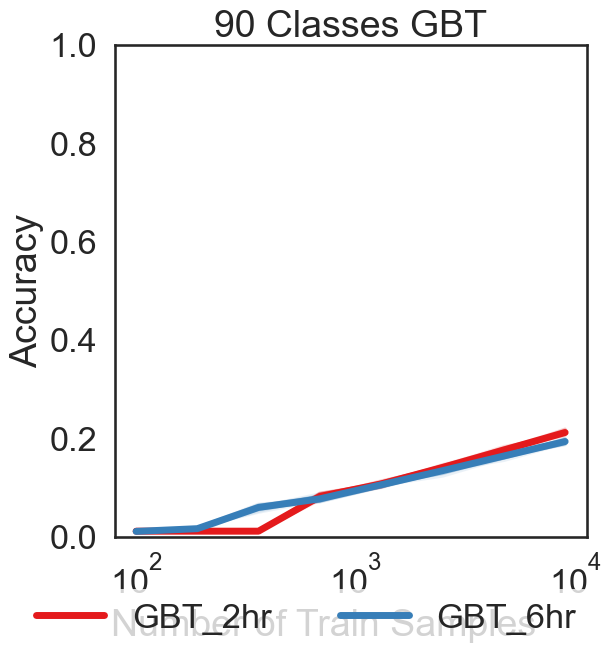

In [9]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="GBT_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="GBT_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "90_class/gbt_acc_2hr.txt"),
    load_result(directory + "90_class/gbt_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("90 Classes GBT")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# RF

mean: [0.02346245 0.04346623 0.06979185 0.08534559 0.1059184  0.12486437
 0.1465198  0.16531916]
min: [0.01265823 0.03483213 0.06138145 0.07315089 0.09546363 0.11440427
 0.14008589 0.15981364]
mean: [0.03721729 0.05541714 0.07478644 0.09399361 0.1173369  0.13903797
 0.16198519 0.18351942]
min: [0.02766036 0.04639252 0.06695865 0.08544657 0.11036988 0.13175475
 0.15550612 0.17771352]


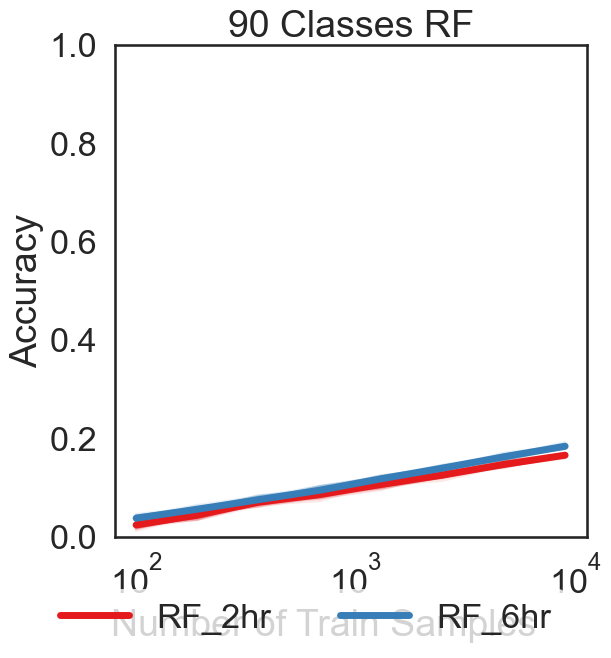

In [12]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="RF_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "90_class/naive_rf_acc_2hr.txt"),
    load_result(directory + "90_class/naive_rf_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("90 Classes RF")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# CNN32_1l

mean: [0.01279012 0.04689383 0.06388642 0.08025185 0.09831111 0.1277679
 0.15750123 0.19127407]
min: [0.00911111 0.03355556 0.05466667 0.06933333 0.08955556 0.11288889
 0.14888889 0.17911111]
mean: [0.01228642 0.04283951 0.0635358  0.08333827 0.1002963  0.12910617
 0.17750123 0.22002963]
min: [0.008      0.012      0.05533333 0.07466667 0.08933333 0.12022222
 0.16733333 0.21      ]


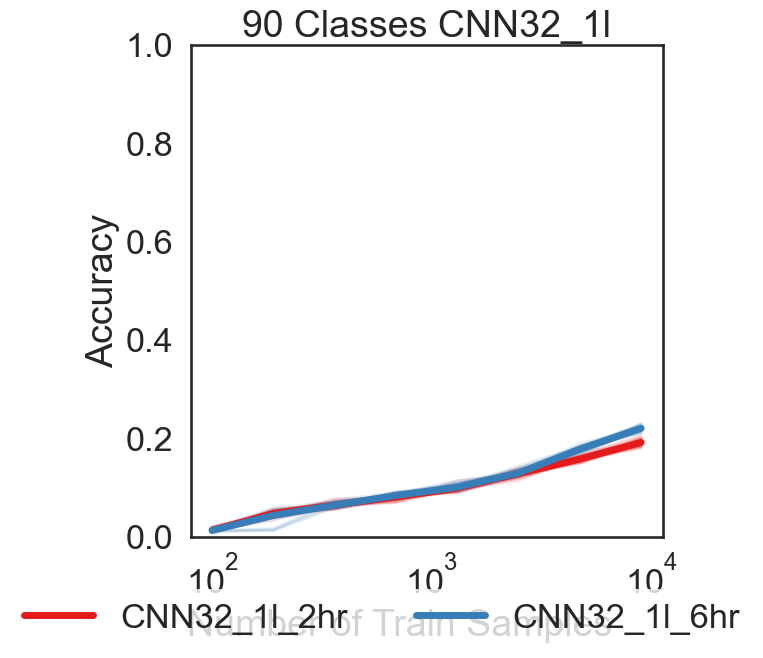

In [12]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_1l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_1l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "90_class/cnn32_acc_2hr.txt"),
    load_result(directory + "90_class/cnn32_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("90 Classes CNN32_1l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# CNN32_2l

mean: [0.02062732 0.02771324 0.03725208 0.05679299 0.09053855 0.11740052
 0.14550614 0.18699884]
min: [0.01354853 0.01518744 0.02418639 0.0318787  0.07557924 0.09787518
 0.12435233 0.16750592]
mean: [0.01366195 0.01332968 0.0138443  0.06390504 0.08770061 0.11934689
 0.15394481 0.19788934]
min: [0.00717084 0.0093147  0.00820157 0.05161195 0.07037776 0.109064
 0.14224488 0.18638682]


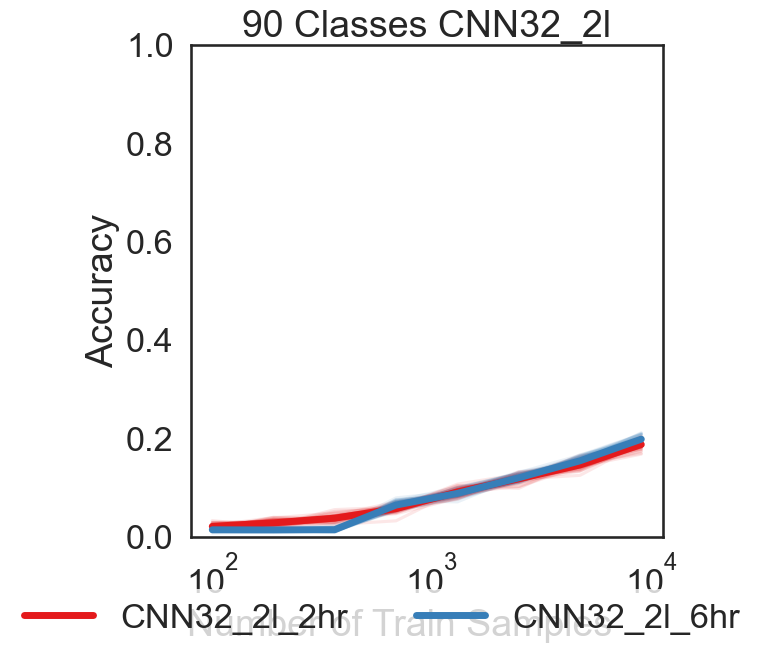

In [13]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_2l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_2l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "90_class/cnn32_2l_acc_2hr.txt"),
    load_result(directory + "90_class/cnn32_2l_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("90 Classes CNN32_2l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# CNN32_5l

mean: [0.01102892 0.01130118 0.01125494 0.01087995 0.03868598 0.07566651
 0.0937073  0.11632506]
min: [0.00809061 0.00531669 0.00809061 0.00693481 0.01479427 0.02797041
 0.05386038 0.03767915]
mean: [0.01091766 0.0177629  0.02263393 0.03607639 0.06606647 0.091875
 0.10535714 0.11346726]
min: [0.00736607 0.00870536 0.0109375  0.01674107 0.03035714 0.06294643
 0.06361607 0.05825893]


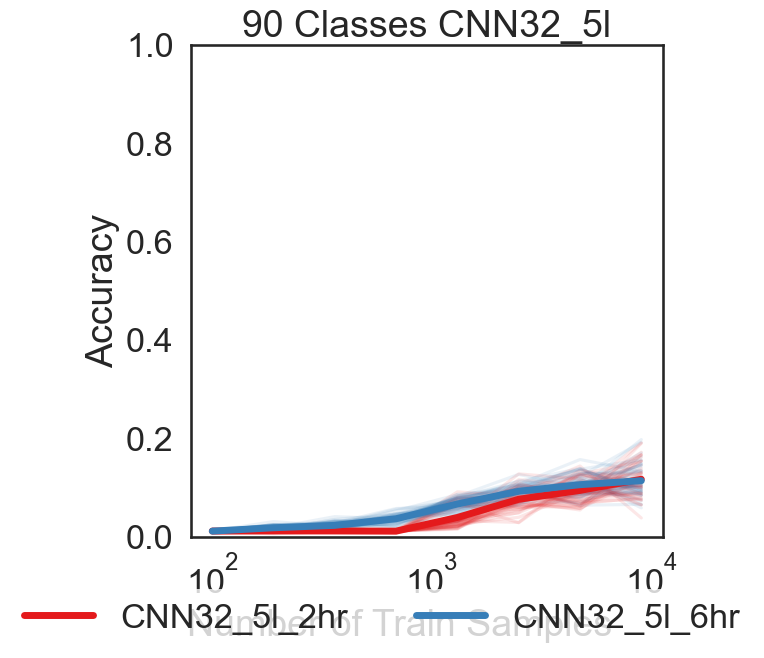

In [14]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN32_5l_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_5l_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "90_class/cnn32_5l_acc_2hr.txt"),
    load_result(directory + "90_class/cnn32_5l_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("90 Classes CNN32_5l")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# Resnet18

mean: [0.02487762 0.0480098  0.07451032 0.11317733 0.16035348 0.21799124
 0.28211698 0.35813555]
min: [0.01480166 0.03890533 0.05850118 0.10555884 0.15054718 0.20455554
 0.26960639 0.34564254]
mean: [0.04949196 0.07324091 0.10656695 0.15076908 0.20374239 0.26617061
 0.34446148 0.39794615]
min: [0.0375351  0.05075992 0.09262816 0.13371664 0.18873198 0.25627399
 0.33505459 0.34515366]


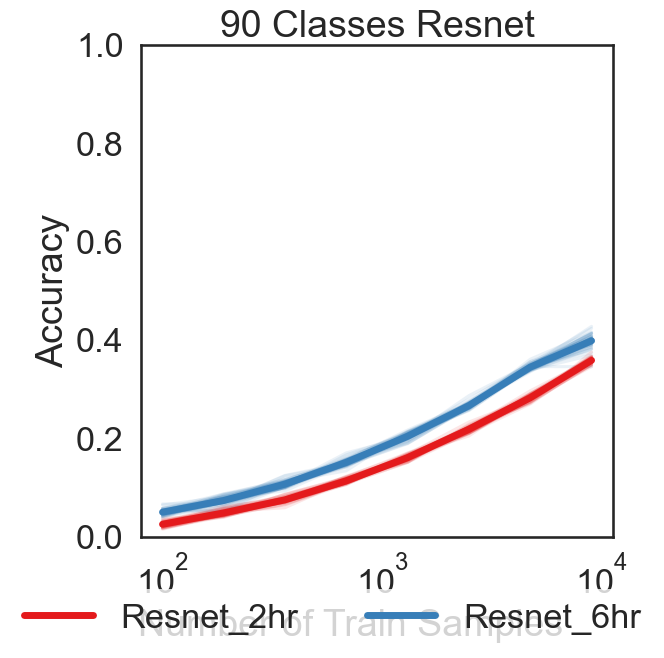

In [16]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="Resnet_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="Resnet_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "90_class/resnet18_acc_2hr.txt"),
    load_result(directory + "90_class/resnet18_acc_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("90 Classes Resnet")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

# plt.savefig("../paper/figures/3class_XGBT_vision.pdf", transparent=True, bbox_inches="tight")
plt.show()



# Summary

In [20]:
def load_results_2vs6(prefix, names):
    """
    Loads results from specified files
    """
    acc_ls = []
    time_ls = []
    for name in names:
        acc_ls.append(load_result(prefix + name + ".txt"))
    return acc_ls

def plot_three(xtitles, accs):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)

    fig.text(0.53, -0.05, "Number of Train Samples", ha="center", fontsize=18)
    # xtitles = ["3 Classes", "8 Classes", "90 Classes"]
    ytitles = ["Accuracy"]
    yticks = [[0, 0.5, 1], [1e-2, 1e0, 1e2]]

    for i, col in enumerate(ax):
        # print(f"i: {i},col: {col}")
        count = i
        col.set_xscale("log")
        col.set_ylim([-0.1, 1])

        if count == 2:
            samples_space = np.geomspace(100, 10000, num=8, dtype=int)
        else:
            samples_space = np.geomspace(10, 10000, num=8, dtype=int)

        # Label x axis and plot figures
        if i == 0:
            col.set_ylabel(ytitles[0], fontsize=18)
        col.set_title(xtitles[i], fontsize=18)
        plot_acc_new(col, accs, i, samples_space)

    fig.align_ylabels(
        ax[
            :,
        ]
    )

    leg = fig.legend(
        bbox_to_anchor=(0.53, -0.3),
        bbox_transform=plt.gcf().transFigure,
        ncol=3,
        loc="lower center",
        fontsize=18,
    )
    leg.get_frame().set_linewidth(0.0)
    # for legobj in leg.legendHandles:
    #     legobj.set_linewidth(5.0)

directory = "../benchmarks/vision/"


# 2hrs

mean: [0.41111053 0.47347411 0.47766446 0.58670625 0.63475544 0.67025236
 0.7007688  0.7377548 ]
min: [0.32250221 0.32130204 0.32630411 0.40781875 0.50178253 0.35172872
 0.47713144 0.54250832]
mean: [0.45802222 0.51817037 0.59238519 0.64457037 0.68268148 0.71391852
 0.73896296 0.75660741]
min: [0.32466667 0.37833333 0.48266667 0.55533333 0.59166667 0.61366667
 0.639      0.66666667]
mean: [0.35549544 0.47314475 0.52005927 0.59760334 0.63679578 0.68728698
 0.73158253 0.76261336]
min: [0.32739274 0.33045021 0.42631345 0.45017794 0.52511111 0.55397285
 0.62936754 0.62522242]
mean: [0.33446181 0.3343533  0.53480903 0.54113498 0.58534071 0.63390842
 0.67694227 0.73301866]
min: [0.32324219 0.32861328 0.37695312 0.39941406 0.39453125 0.39501953
 0.3515625  0.53564453]
mean: [0.41653113 0.44704188 0.53086976 0.64092823 0.70757772 0.76782228
 0.82155345 0.86288966]
min: [0.30196598 0.35062333 0.311327   0.53805073 0.58846918 0.63618158
 0.72100729 0.76297769]
mean: [0.3331161  0.3331161  0.5347

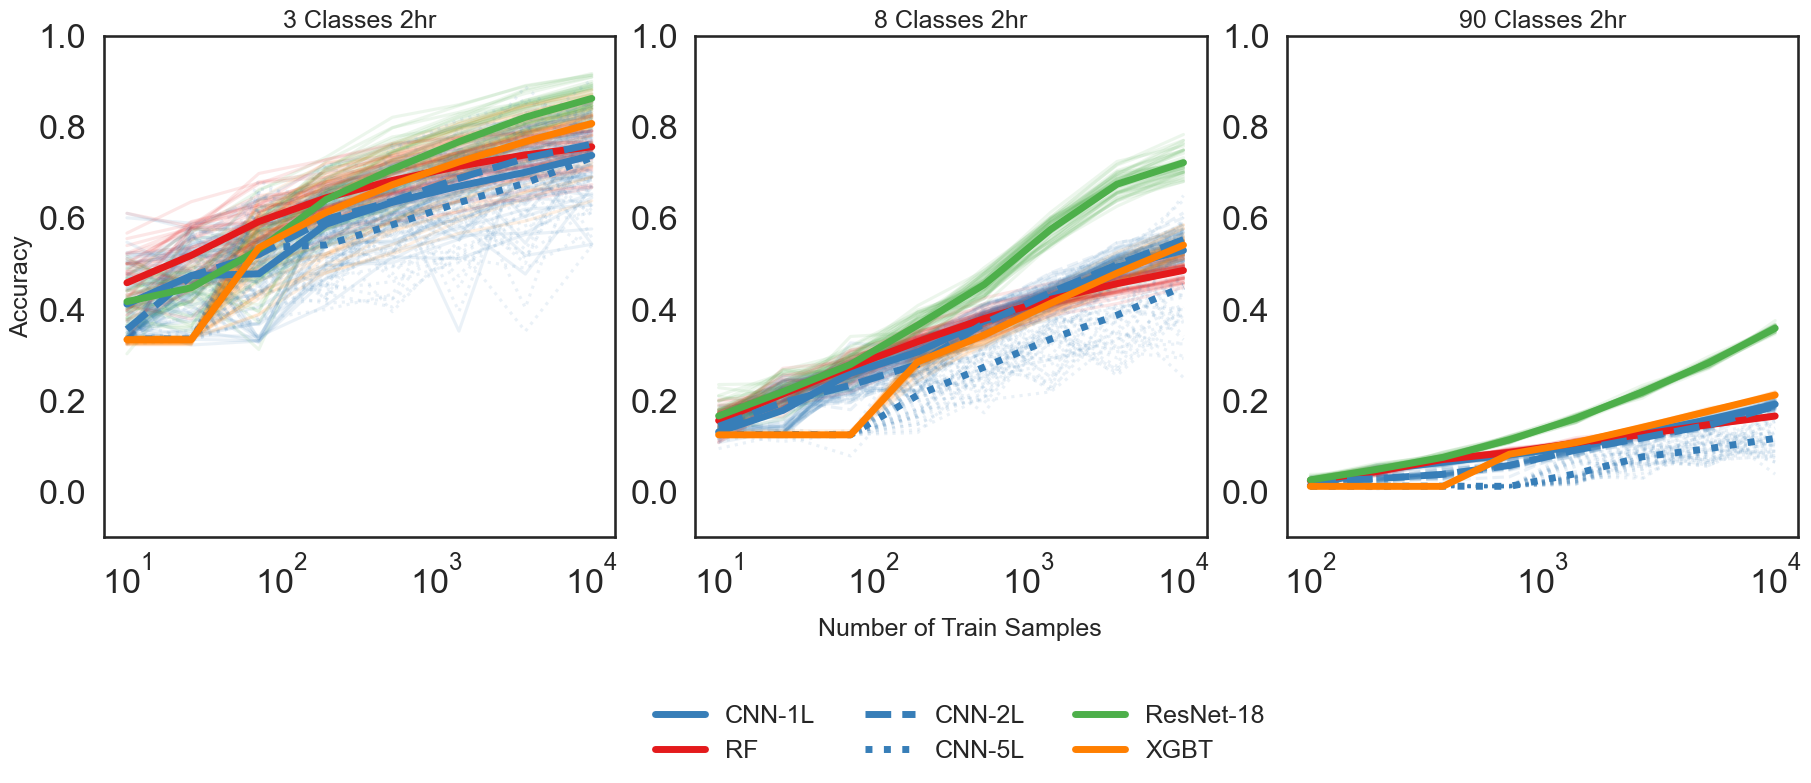

In [21]:
names_2hr = ["naive_rf_acc_2hr", "cnn32_acc_2hr", "cnn32_2l_acc_2hr", "cnn32_5l_acc_2hr", "resnet18_acc_2hr", "gbt_acc_2hr"]
acc_3_2hr = load_results_2vs6(directory + "3_class/", names_2hr)
acc_8_2hr = load_results_2vs6(directory + "8_class/", names_2hr)
acc_90_2hr = load_results_2vs6(directory + "90_class/", names_2hr)
accs_2hr = [acc_3_2hr, acc_8_2hr, acc_90_2hr]
xtitles_2hr = ["3 Classes 2hr", "8 Classes 2hr", "90 Classes 2hr"]
# print(len(acc_3_2hr))

plot_three(xtitles_2hr, accs_2hr)

# 6hrs

mean: [0.39636341 0.52641026 0.61368576 0.65426066 0.6999929  0.74032057
 0.77318672 0.8042858 ]
min: [0.32904941 0.32927099 0.47844539 0.53443709 0.58256071 0.62163355
 0.66234926 0.69584636]
mean: [0.39731472 0.50624461 0.57432868 0.63479436 0.67328171 0.70594977
 0.73064558 0.74750065]
min: [0.2777036  0.39240506 0.45317019 0.53375993 0.57028648 0.6293894
 0.65074024 0.65836698]
mean: [0.39429844 0.45805487 0.47836215 0.50262316 0.51619416 0.63385517
 0.69908176 0.74260256]
min: [0.28798938 0.33102833 0.33311258 0.32836816 0.32163355 0.33236866
 0.56126745 0.5922957 ]
mean: [0.33354469 0.33152174 0.52460749 0.54104771 0.55695954 0.58737923
 0.59977355 0.58888889]
min: [0.31317935 0.29347826 0.33899457 0.38451087 0.34442935 0.34442935
 0.36209239 0.37907609]
mean: [0.41933687 0.46395242 0.54803324 0.60327755 0.69633599 0.80572074
 0.89814517 0.91483815]
min: [0.30226868 0.34234033 0.36861962 0.34832962 0.46226623 0.6159612
 0.7979664  0.82272325]
mean: [0.32930265 0.32930265 0.572782

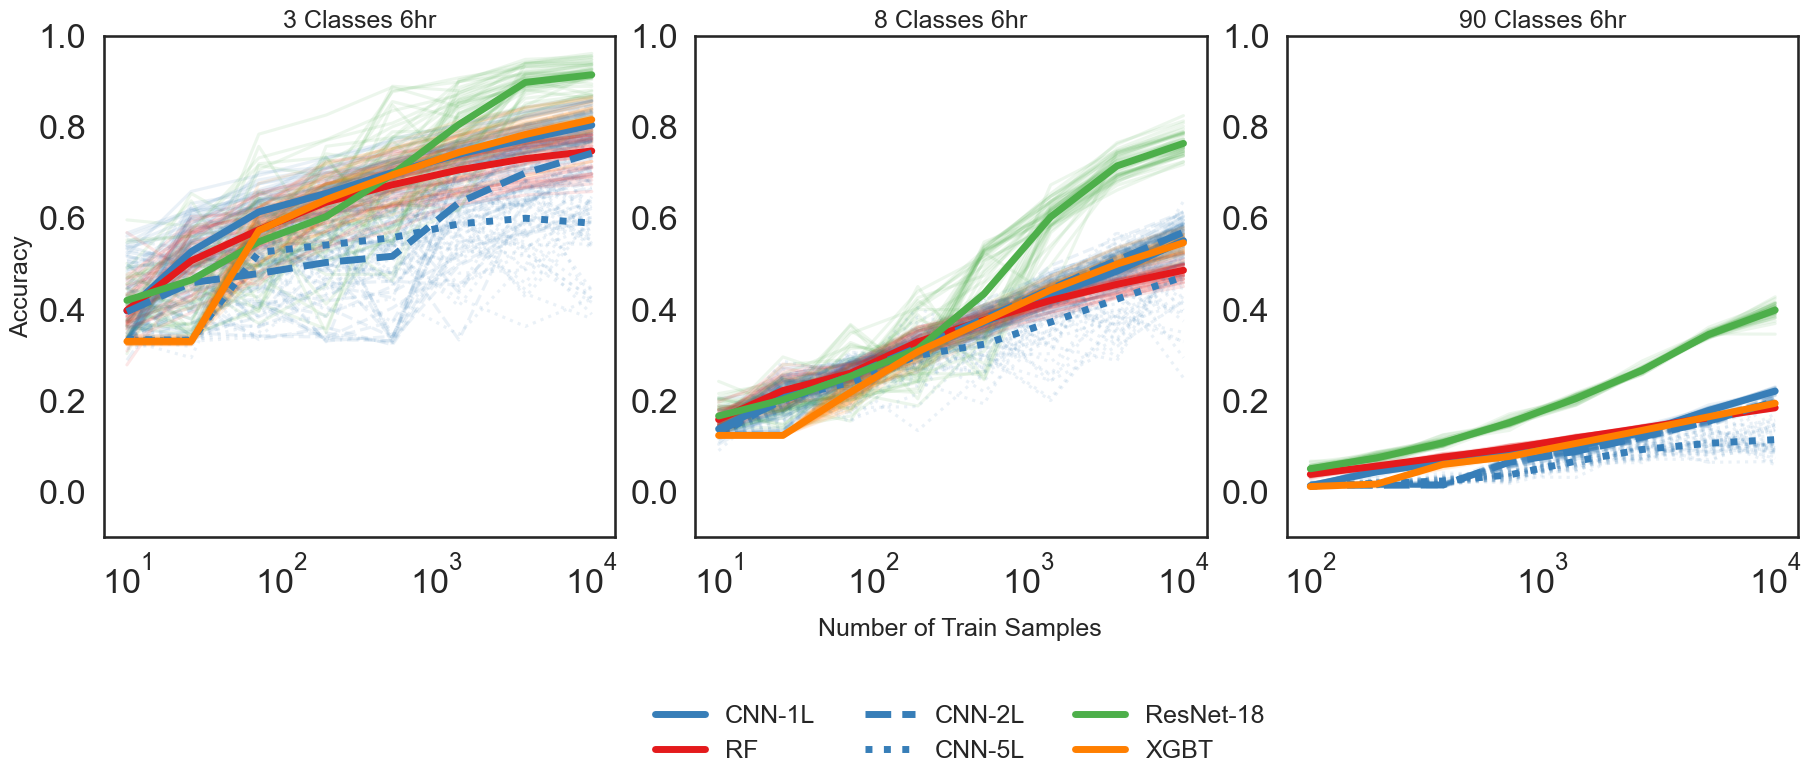

In [22]:
names_6hr = ["naive_rf_acc_6hr", "cnn32_acc_6hr", "cnn32_2l_acc_6hr", "cnn32_5l_acc_6hr", "resnet18_acc_6hr", "gbt_acc_6hr"]
acc_3_6hr = load_results_2vs6(directory + "3_class/", names_6hr)
acc_8_6hr = load_results_2vs6(directory + "8_class/", names_6hr)
acc_90_6hr = load_results_2vs6(directory + "90_class/", names_6hr)
accs_6hr = [acc_3_6hr, acc_8_6hr, acc_90_6hr]
xtitles_6hr = ["3 Classes 6hr", "8 Classes 6hr", "90 Classes 6hr"]
# print(len(acc_3_2hr))

plot_three(xtitles_6hr, accs_6hr)

/var/folders/w0/pq4q2kj50fvdt6t_4y4gqfvw0000gn/T/ipykernel_61284/2376881393.py:164: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


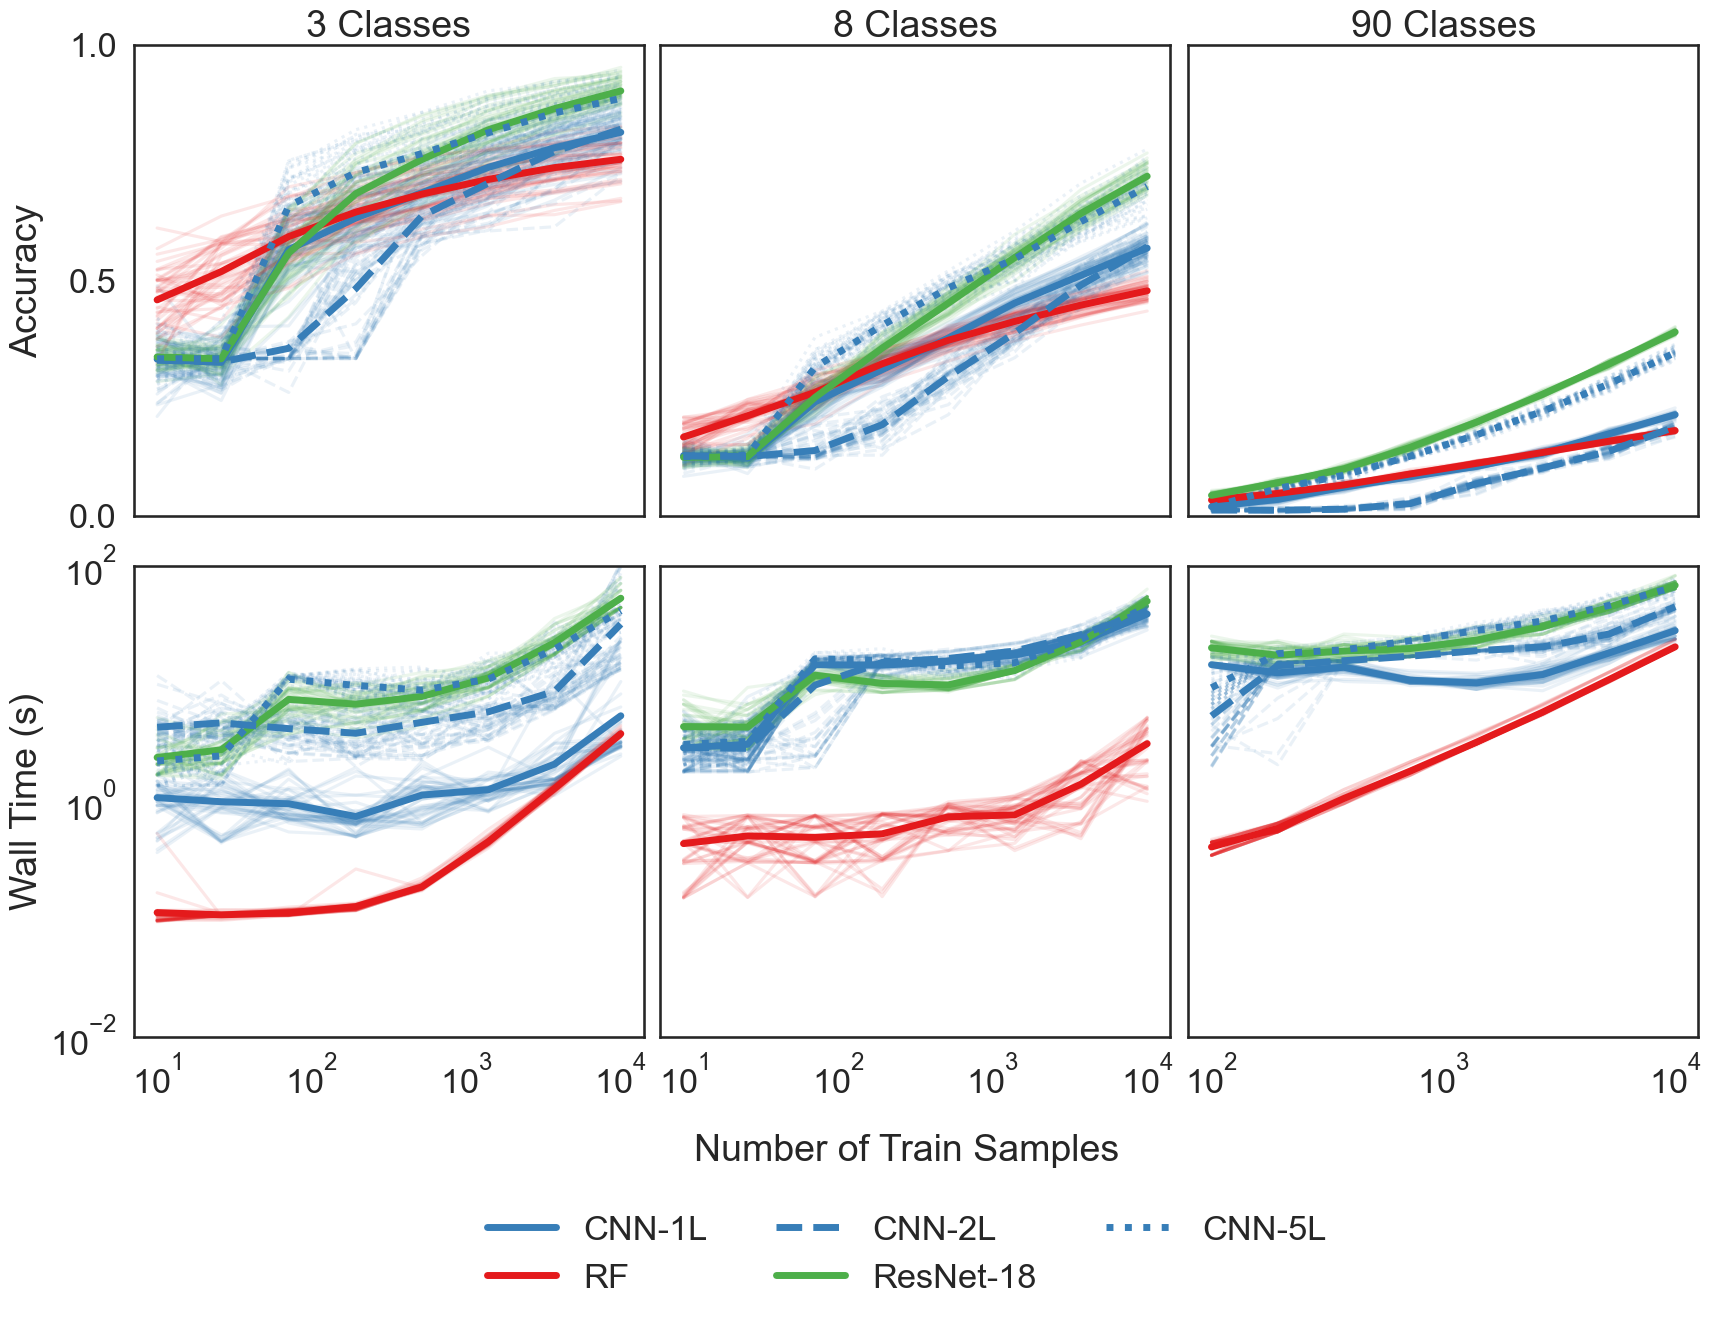

In [9]:
directory = "../benchmarks/vision/"
names = ["naive_rf", "cnn32", "cnn32_2l", "cnn32_5l", "resnet18"]

# Load 3-classes results
acc_3, time_3 = load_results(directory + "3_class/")

# Load 8-classes results
acc_8, time_8 = load_results(directory + "8_class/")

# Load 90-classes results
acc_90, time_90 = load_results(directory + "90_class/")

accs = [acc_3, acc_8, acc_90, time_3, time_8, time_90]
plot_six()
plt.savefig("../paper/figures/cifar.pdf", transparent=True, bbox_inches="tight")

## DF/DN with Fixed Training Time

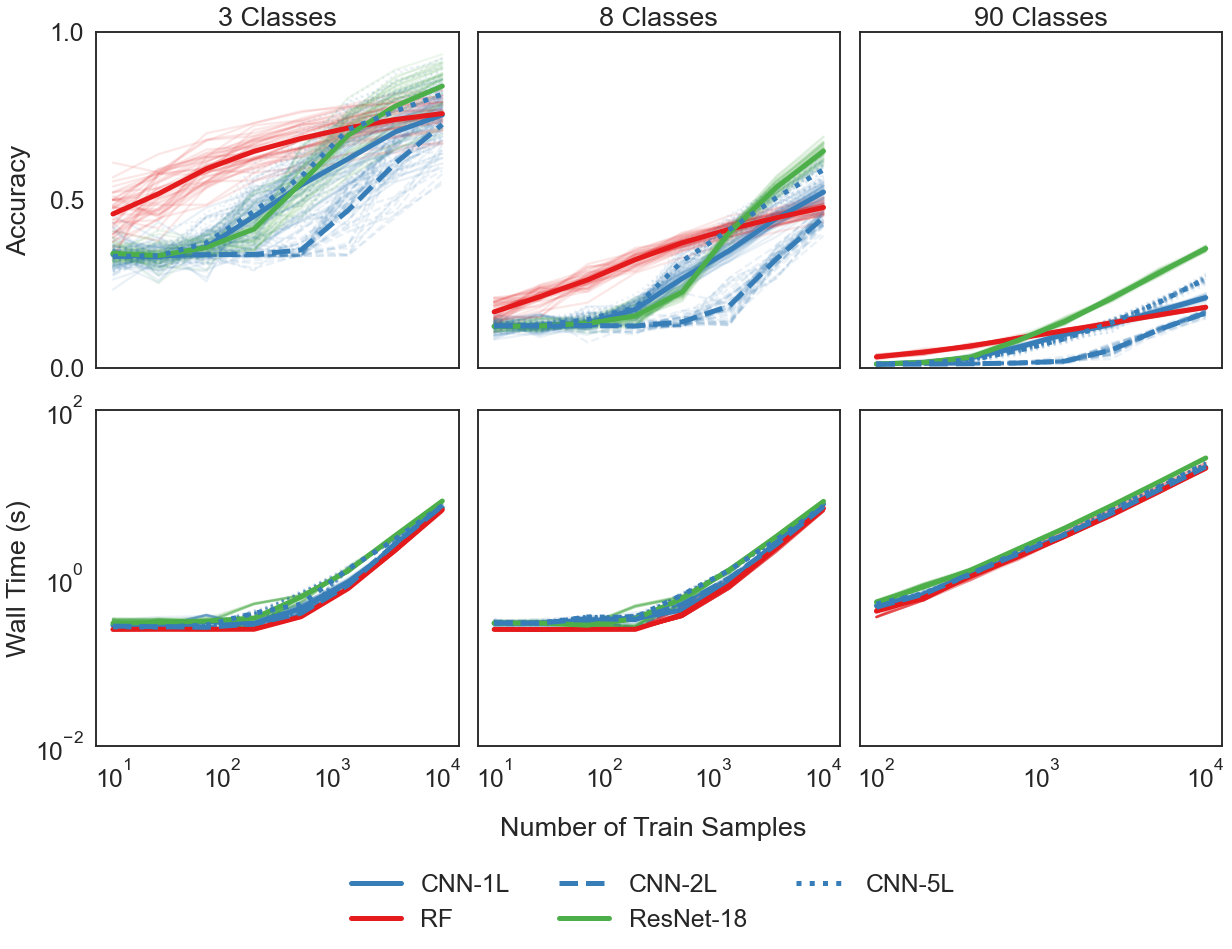

In [6]:
# Load 3-classes results
acc_3, time_3 = load_results_st(directory + "3_class/")

# Load 8-classes results
acc_8, time_8 = load_results_st(directory + "8_class/")

# Load 90-classes results
acc_90, time_90 = load_results_st(directory + "90_class/")

accs = [acc_3, acc_8, acc_90, time_3, time_8, time_90]
plot_six()
plt.savefig("../paper/figures/cifar_st.pdf", transparent=True, bbox_inches="tight")

## DF/DN with Fixed Training Cost

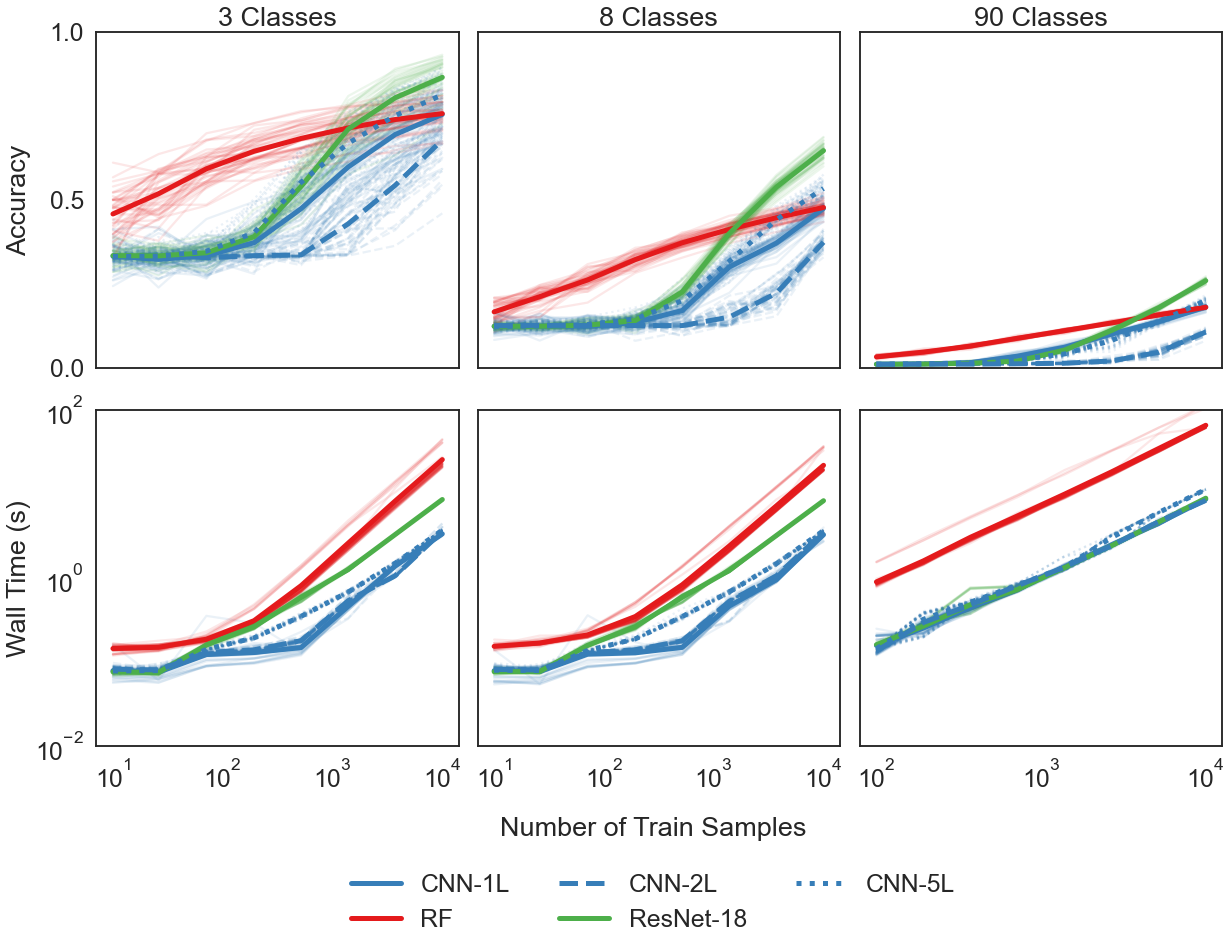

In [7]:
# Load 3-classes results
acc_3, time_3 = load_results_sc(directory + "3_class/")

# Load 8-classes results
acc_8, time_8 = load_results_sc(directory + "8_class/")

# Load 90-classes results
acc_90, time_90 = load_results_sc(directory + "90_class/")

accs = [acc_3, acc_8, acc_90, time_3, time_8, time_90]
plot_six()
plt.savefig("../paper/figures/cifar_sc.pdf", transparent=True, bbox_inches="tight")